In [1]:
] activate "C:\Users\Arman Angaji\OneDrive - Universität zu Köln\Dokumente\Uni-Köln\Masterarbeit\Workspace\Julia_Master\MasterProject_Julia"

  Activating environment at `C:\Users\Arman Angaji\OneDrive - Universität zu Köln\Dokumente\Uni-Köln\Masterarbeit\Workspace\Julia_Master\MasterProject_Julia\Project.toml`


In [4]:
using DataFrames
using StatsBase
using Plots
using Statistics
using LaTeXStrings

include("Turnover.jl")
include("test.jl")
using .Turnover

using TumorGrowth: DataFrame, clones_by_mutations

Test Summary:             | Pass  Total
Applying turnover methods |    7      7


In [5]:
b, d, μ = 1., 0.2, 0.1
tumor, obs, N, t = neutral_growth(5000; b = b, d = d, μ = μ, return_obs=true);
tumor, obs, N, t = neutral_growth!(tumor, obs, 10000; Nthresh=5000, b = b, d = d, μ = μ, t=t);
N, t

(10000, 10.533246796784944)

In [23]:
using BenchmarkTools
@btime orphaned_red(DataFrame($tumor));
@btime orphaned_red_treeless(filter!(h->!iszero(h.n), DataFrame($tumor)));

  45.402 ms (648033 allocations: 13.95 MiB)
  34.463 ms (429986 allocations: 11.35 MiB)


In [4]:
using BenchmarkTools
b, d, μ = 1., 0.8, 0.1
@btime neutral_growth($5000; b =$b, d = $d, μ = $μ, return_obs=$true, showprogress=false);
@btime neutral_growth($5000; b =$b, d = $d, μ = $μ, return_obs=$false, showprogress=false);

  325.780 ms (1696455 allocations: 157.14 MiB)
  102.364 ms (748633 allocations: 126.04 MiB)


In [93]:
?q

search: q qs quote quiver quiver! qqbuild QQPair quantile quantile! QuoteNode



```
q(d; b, μ )
```

Function returning the extinction probability for given `d` death-rate, `b` birth-rate and `μ` mutation-rate. <br> **Branchingprocess `v2`**: independent mutation of offspring pair at division. `μ` is the probability of mutation per cell division. The mutation probability per cell division per cell is `μ/2`.


### Turnover

In [5]:
sim = include("turnover_data/orphaned_red_turnover.jl")
# sim = include("turnover_data/orphaned_green_turnover.jl")
sim[1]

Dict{Symbol, Any} with 8 entries:
  :std      => [0.0, 0.00343, 0.0049, 0.00664, 0.00792, 0.00925, 0.0107, 0.0123…
  :b        => 1.0
  :N        => 5000
  :Ncutoff  => 1000
  :μ        => 0.3
  :reps     => 500
  :turnover => [0.0, 0.00407, 0.00802, 0.01231, 0.01681, 0.02034, 0.02505, 0.02…
  :d        => [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45  …  0.7, …

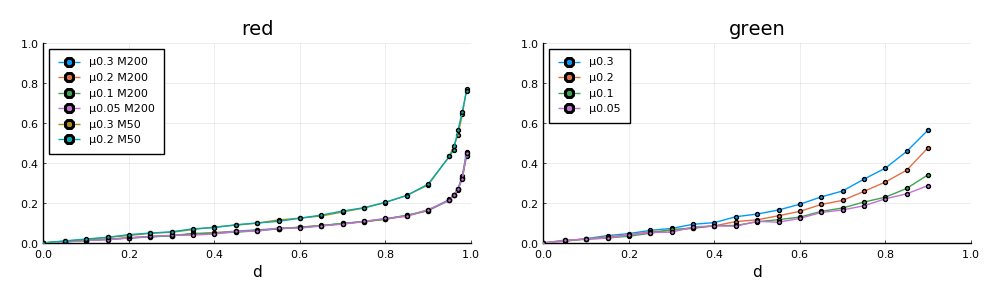

In [88]:
p = plot(layout=(1,2), size=(1000,300), legend=:topleft, margin=5Plots.mm, ylims=(0,1), xlims=(0,1))
for res in include("orphaned_red_turnover.jl")
    ds = res[:d]
    plot!(p[1], ds ,res[:turnover], xlab=:d, lab="μ$(res[:μ]) M$(res[:Ncutoff])", marker=:o, ms=3., title=:red)
end
for res in include("orphaned_green_turnover.jl")
    ds = res[:d]
    plot!(p[2], ds ,res[:turnover], xlab=:d, lab="μ$(res[:μ])", marker=:o, ms=3., title=:green)
end
plot!()

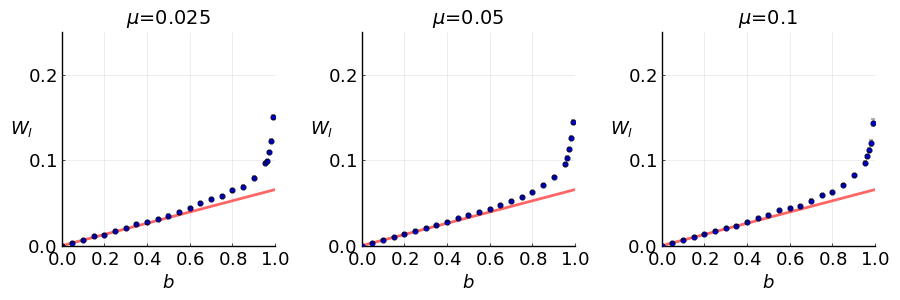

In [6]:
pyplot()
p = plot(layout = (1,3), size=(900,300), legend=:none, margin=2Plots.mm, aspect_ratio=1/0.25,
        xaxis = (L"b", (0, 1)), yaxis = (L"W_l", (0, 0.25)), yguidefontrotation=-90,
        guidefont = (13), tickfont = (13), xticks=0.:0.2:1., yticks=0.:0.1:1.0)
for (i,res) in enumerate(sim[5:-1:3])
        
    b, μ, N = res[:b],res[:μ],res[:Ncutoff]
    
    ds = 0.0:0.001:1.
    qs = ds./b
    
    plot!(p[i], ds , Turnover.W_orphaned.(qs; N=N), lw=2., c=:red, alpha=0.6)
    
    scatter!(p[i], res[:d] ,res[:turnover] , title=L"μ"*"=$(μ/2)",
        marker=:o, ms=4., c=:blue, alpha=1., markerstrokewidth=0.5)
    plot!(p[i], res[:d],res[:turnover] , yerror = res[:std] ./ sqrt(res[:reps]),
       ms=3., alpha=0.3, markerstrokewidth=0.9, fillalpha=1., lw=0.)

end
plot!()

In [9]:
# savefig("turnover_plots/orphaned_turnover_series.png")

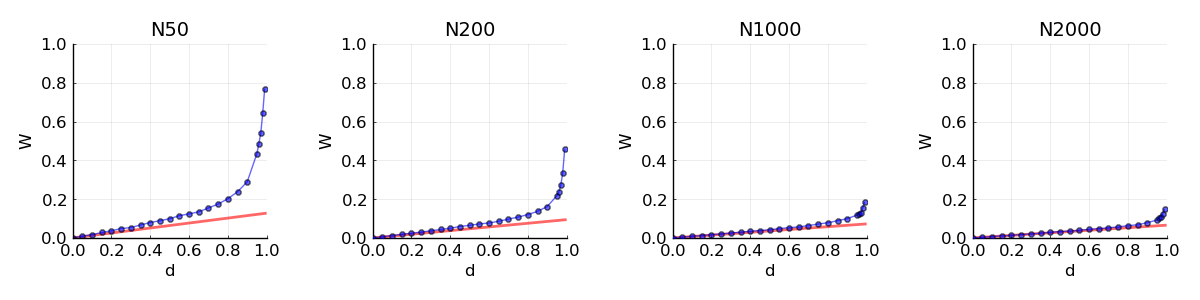

In [4]:
pyplot()
p = plot(layout = (1,4), size=(1200,300), legend=:none, margin=5Plots.mm, aspect_ratio=1,
        xaxis = ("d", (0, 1)), yaxis = ("W", (0, 1.)), yguidefontrotation=-0,
        guidefont = (12), tickfont = (12), xticks=0.:0.2:1., yticks=0.:0.2:1.0)

sets = (sim[8], sim[4], sim[1:2]...)
for (i,res) in enumerate(sets)
        
    b, μ, N = res[:b],res[:μ],res[:Ncutoff]
    
    ds = 0.0:0.001:1.
    qs = ds./b
    
    plot!(p[i], ds , Turnover.W_orphaned.(qs; N=N), lw=2., c=:red, alpha=0.6)
    
    plot!(p[i],res[:d] ,res[:turnover], marker=:o, ms=4., title="N$N", c=:blue, alpha=0.6)#, yerror=res[:std])

end
plot!()

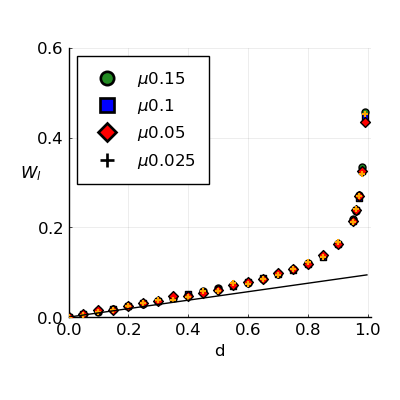

In [97]:
p = plot(size=(400,400), legend=:topleft, margin=5Plots.mm, aspect_ratio=1.5,
        xaxis = (L"d", (0, 1.01)), yaxis = (L"W_l", (0, 0.6)), yguidefontrotation=-90,
        legendfont = (12), guidefont = (12), tickfont = (12), xticks=0.:0.2:1., yticks=0.:0.2:1.0)
colors = [:forestgreen,:blue,:red,:orange]
shapes = [:c, :sq, :d, :+]
for (i,res) in enumerate(sim[7:10])
    b, μ, N = res[:b],res[:μ],res[:Ncutoff]
    ds = res[:d]
    scatter!(ds ,res[:turnover], xlab=:d, lab=L"μ"*"$(μ/2)", marker=shapes[i], color=colors[i], ms=5.)
end
ds = 0.0:0.001:1
qs = ds./b
plot!(ds , Turnover.W_orphaned.(qs; N=200), lab="", c=:black)

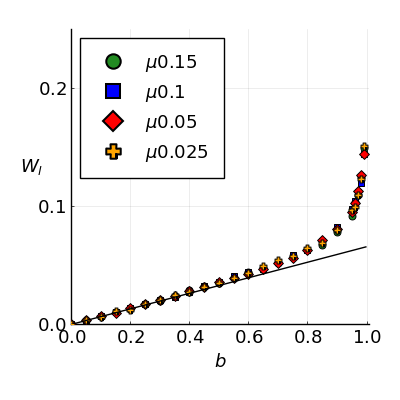

In [46]:
pyplot()
p = plot(size=(400,400), legend=:topleft, margin=5Plots.mm, aspect_ratio=1/0.25,
        xaxis = (L"b", (0, 1.01)), yaxis = (L"W_l", (0, 0.25)), yguidefontrotation=-90,
        legendfont = (13), guidefont = (13), tickfont = (13), xticks=0.:0.2:1., yticks=0.:0.1:1.0)
colors = [:forestgreen,:blue,:red,:orange]
shapes = [:c, :sq, :d, :cross]
for (i,res) in enumerate(sim[2:5])
    b, μ, N = res[:b],res[:μ],res[:Ncutoff]
    ds = res[:d]
    scatter!(ds ,res[:turnover], lab=L"μ"*"$(μ/2)", markershape=shapes[i], color=colors[i], ms=5., msw=0.7)
end
ds = 0.0:0.001:1
b, N = 1., 2000
qs = ds./b
plot!(ds , Turnover.W_orphaned.(qs; N=N), lab="", color=:black)

In [49]:
# savefig("turnover_plots/clone_turnover.png")

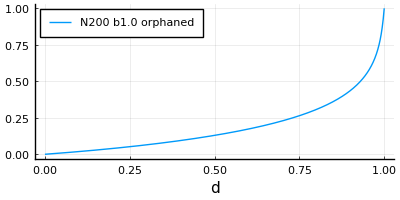

In [14]:
# average over green clones (offspring)
Ncutoff = 200
b = 1.0
ds = 0.0:0.001:1.
po = [ q >= 1. ? 1. : q/(1-q) * sum( 1 - q^(Ncutoff/n) for n = 1:Ncutoff) / sum(Ncutoff/n for n = 1:Ncutoff) for q in ds ./ b]

p_orph = plot(ds, po, lab="N$Ncutoff b$b orphaned", legend=:topleft, xlab=:d, size=(400,200))

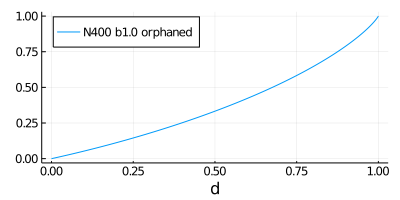

In [221]:
# average over red clones (parents)

b = 1.0
ds = 0.0:0.001:1.
po = [ q >= 1. ? 1. : q/(1-q) * sum( (1 - q^(Ncutoff/n))/(Ncutoff/n) for n = 1:Ncutoff) / (Ncutoff) for q in ds ./ b]

p_orph = plot(ds, po, lab="N$Ncutoff b$b orphaned", legend=:topleft, xlab=:d, size=(400,200))

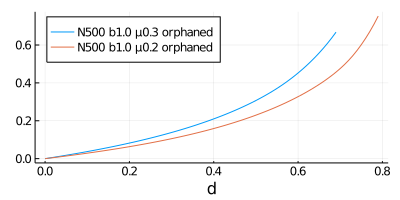

In [61]:
b, μ = 1.0, 0.2
ds = 0.0:0.01:b*(1-μ) - 0.001
po = similar(collect(ds))
for (i,q) in enumerate(ds/b)
    if q >=1.
        po[i] = 1.
    else
        normval = 0.
        for N1 = 1:Ncutoff
            M = (Ncutoff/N1)^(1-μ/(1-q))
            tm = sum( q^( n^(1/(1-μ/(1-q))) ) for n=1:M )
            po[i] += tm
            normval+=M
        end
        po[i] /= normval
    end
end

p_orph = plot!(ds, po, lab="N$Ncutoff b$b μ$μ orphaned", legend=:topleft, xlab=:d, size=(400,200))

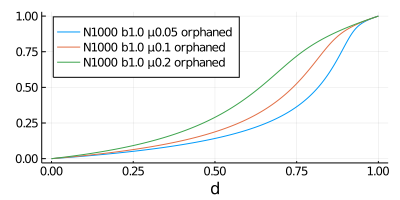

In [96]:
b, μ = 1.0, 0.2
ds = 0.0:0.001:1.
po = [ q >= 1. ? 1. : q/(1-q) * sum( 1 - q^((Ncutoff/n)^(1-μ/(1-q))) for n = 1:Ncutoff) / sum((Ncutoff/n)^(1-μ/(1-q)) for n = 1:Ncutoff) for q in ds ./ b]

p_orph = plot!(ds, po, lab="N$Ncutoff b$b μ$μ orphaned", legend=:topleft, xlab=:d, size=(400,200))

### M estimate

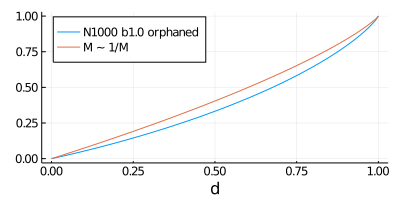

In [201]:
b = 1.0
po = [q >=1. ? 1. : q/(1-q) * sum( (1 - q^M) * 1/M^3 for M = 1:Ncutoff) / sum(1/M^2 for M = 1:Ncutoff) for q in ds ./ b]
plot!(p_orph, ds, po, lab="M ~ 1/M", legend=:topleft)

# # po = [q >=1. ? 1. : q/(1-q) * sum( (1 - q^M)/M * pM[M] for M = 1:Ncutoff) / sum(pM[M] for M = 1:Ncutoff) for q in ds ./ b]
# # plot!(p_orph, ds, po, lab="M ~ hist", legend=:topleft)

### n estimate

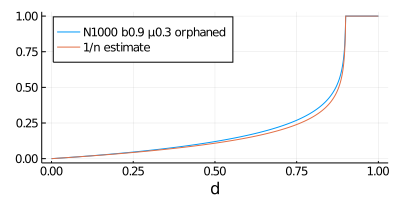

In [303]:
b = 0.9

pn = [q >= 1. ? 1. : sum( q^n*1/n for n=1:Ncutoff) / sum( 1/n for n=1:Ncutoff) for q in ds ./ b]
plot!(p_orph, ds, pn, lab="1/n estimate", legend=:topleft)

# pn = [d/b >= 1. ? 1. : sum( (d/b)^n*pn_orph[i][n] for n=1:length(pn_orph[i])) for (i,d) in enumerate(0.:0.05:0.85)]
# plot!(p_orph, 0.:0.05:0.85, pn, lab="n hist", legend=:topleft)
# pn = [d/b >= 1. ? 1. : sum( (d/b)^n*pn_estr[i][n] for n=1:length(pn_estr[i])) for (i,d) in enumerate(0.:0.05:0.85)]
# plot!(p_orph, 0.:0.05:0.85, pn, lab="n hist", legend=:topleft)

## Single clone orphaned turnover

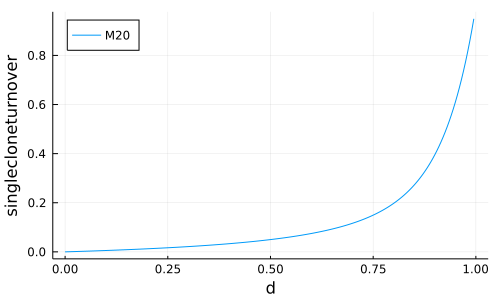

In [9]:
b = 1.

M = 20
estim = [ min(1., d/b ) |> q-> q/(1-q)*(1-q^M)/M for d = 0.:0.005:1.]
plot(0.:0.005:1., estim, lab="M$M", legend=:topleft, xlab=:d, ylab=:singlecloneturnover, size=(500,300))

In [191]:
b, μ = 1., 0.05
drange = collect(0.0:0.05:0.95)
push!(drange, 0.975)
reps = 300

countorph = zeros(Float64, length(drange))

for (i,dp)=enumerate(drange)
    q = dp/b
    
    k = 0
    ntot = 0
    for _=1:reps
        out = neutral_growth(10*M ; Nthresh=M, b = b, d = dp, μ = μ)
        tumor = DataFrame(out[1])
        obs = out[2][:, 2]
        isempty(obs) && continue
        mtypes = clones_by_mutations(tumor)[1]
        freqs = sum.(getproperty.(mtypes,:n))
        filter!(!iszero, freqs)
        isempty(freqs) && continue
        k += 1
        ntot += length(freqs)
        countorph[i] += count(iszero, 10*M .- freqs )
    end
    countorph[i] /= ntot
    
    print("d",dp," ")
    sleep(0.1)
end

d0.0 d0.05 d0.1 d0.15 d0.2 d0.25 d0.3 d0.35 d0.4 d0.45 d0.5 d0.55 d0.6 d0.65 d0.7 d0.75 d0.8 d0.85 d0.9 d0.95 d0.975 

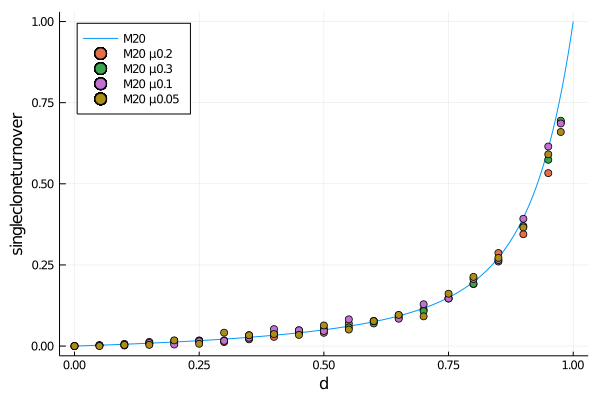

In [192]:
scatter!(drange, countorph, lab="M$M μ$μ")

In [193]:
# savefig("singleclone_orphaned_turnover_M20.png")

### expected clone turnover

In [21]:
exp(0.1*20)

7.38905609893065

In [26]:
Ncutoff, Tcutoff = 2000, 15

b, μ = 1., 0.1
drange = collect(0.0:0.05:0.90)
# drange = collect(0.95:0.01:0.99)

reps = 200
countorph = Matrix{Float64}(undef, length(drange), reps)
countgreens = Matrix{Float64}(undef, length(drange), reps)

for (i,dp)=enumerate(drange)
    
    j = 1
    while j <= reps
        htumor, clonesizes, obs, N, t = neutral_growth_clones(Ncutoff, Tcutoff; b = b, d = dp, μ = μ, showprogress=false)
        
        res = orphaned_red_expected(dp/b, obs)
        if !isempty(res)
            countorph[i,j], countgreens[i,j] = sum(res.isorphaned), nrow(res)
            j += 1
        end
    end
    
    print("d",dp," ")
    sleep(0.1)
end

d0.0 d0.05 d0.1 d0.15 d0.2 d0.25 d0.3 d0.35 d0.4 d0.45 d0.5 d0.55 d0.6 d0.65 d0.7 d0.75 d0.8 d0.85 d0.9 

In [27]:
t = [sum(countorph[i,1:end-1]) / sum(countgreens[i,1:end-1]) for i=1:length(drange)]
sterr = [filter!(!isnan, countorph[i,:] ./ countgreens[i,:]) |> x-> std(x)/sqrt(length(x)) for i=1:length(drange)]
round.(t, digits=5) |> println
round.(sterr, digits=5) |> println

[0.0, 0.00407, 0.00783, 0.01252, 0.01582, 0.01889, 0.02376, 0.02731, 0.03426, 0.04019, 0.04202, 0.05053, 0.05824, 0.07115, 0.09438, 0.12548, 0.17273, 0.28091, 0.33795]
[0.0, 0.00019, 0.00032, 0.00043, 0.00069, 0.00115, 0.00115, 0.00125, 0.00116, 0.00218, 0.00215, 0.004, 0.00613, 0.00588, 0.00717, 0.00966, 0.01203, 0.01294, 0.01402]


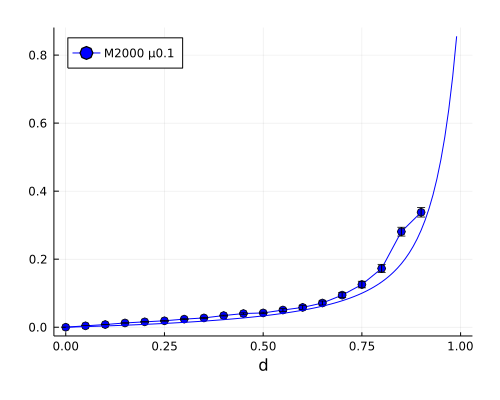

In [28]:
plot(drange, t, yerror=sterr, lab="M$Ncutoff μ$μ", xlabel=:d, size=(500,400), legend=:topleft, margin=5Plots.mm, marker=:o, c=:blue)
ds = 0.:0.01:1.
# plot!(ds, W_orphaned.(ds ./ b; N=Ncutoff), lab="", c=:blue )
plot!(ds, [W_orphaned(dp / b; N=exp(Tcutoff*(b-dp))) for dp in ds], lab="", c=:blue )

### clone turnover

In [44]:
N, Ncutoff = 10000, 500
T, Tcutoff = 80., 10.

b, μ = 1., 0.2
drange = collect(0.0:0.05:0.90)
# drange = collect(0.95:0.01:0.99)

reps = 400
countorph = Matrix{Float64}(undef, length(drange), reps)
countgreens = Matrix{Float64}(undef, length(drange), reps)

for (i,dp)=enumerate(drange)
    
    j = 1
    while j <= reps
        htumor = neutral_growth(N , T; Nthresh= Ncutoff, Tthresh=Tcutoff, b = b, d = dp, μ = μ, return_obs=false, showprogress=false)[:tumor] |> DataFrame
        
#         res = orphaned_red_treeless(htumor)
#         res = orphaned_red_treeless(filter(h-> !iszero(h.n), htumor))
        res = orphaned_red(htumor)
        if !isempty(res)
            countorph[i,j], countgreens[i,j] = sum(res.isorphaned), nrow(res)
            j += 1
        end
    end
    
    print("d",dp," ")
    sleep(0.1)
end

d0.0 d0.05 d0.1 d0.15 d0.2 d0.25 d0.3 d0.35 d0.4 d0.45 d0.5 d0.55 d0.6 d0.65 d0.7 d0.75 d0.8 d0.85 d0.9 

In [47]:
t = [sum(countorph[i,1:end-1]) / sum(countgreens[i,1:end-1]) for i=1:length(drange)]
sterr = [filter!(!isnan, countorph[i,:] ./ countgreens[i,:]) |> x-> std(x)/sqrt(length(x)) for i=1:length(drange)]
round.(t, digits=5) |> println
round.(sterr, digits=5) |> println

[0.0, 0.005, 0.0099, 0.01482, 0.02038, 0.02475, 0.03277, 0.03864, 0.04578, 0.05351, 0.06384, 0.0811, 0.09371, 0.12857, 0.1505, 0.1924, 0.24281, 0.34731, 0.46959]
[0.0, 0.00046, 0.00269, 0.00107, 0.00115, 0.00368, 0.00168, 0.00219, 0.00497, 0.00332, 0.00565, 0.00734, 0.00925, 0.01124, 0.01398, 0.01608, 0.01801, 0.01918, 0.02018]


In [11]:
sim = include("turnover_data/orphaned_red_turnover.jl");
# sim = include("turnover_data/orphaned_green_turnover.jl);

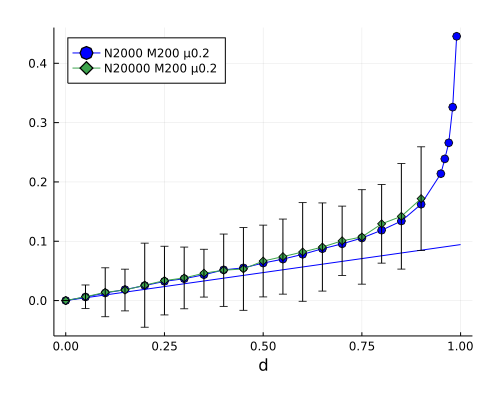

In [55]:
res = sim[8]
plot(res[:d], res[:turnover], lab="N$(res[:N]) M$(res[:Ncutoff]) μ$(res[:μ])", xlabel=:d, size=(500,400), legend=:topleft, margin=5Plots.mm, marker=:o, c=:blue)
ds = 0.:0.01:1.

plot!(ds, W_orphaned.(ds ./ res[:b]; N=res[:Ncutoff]), lab="", c=:blue )

res = data[2]
plot!(res[:d], res[:turnover], lab="N$(res[:N]) M$(res[:Ncutoff]) μ$(res[:μ])", marker=:d, xlabel=:d, yerror = res[:err])

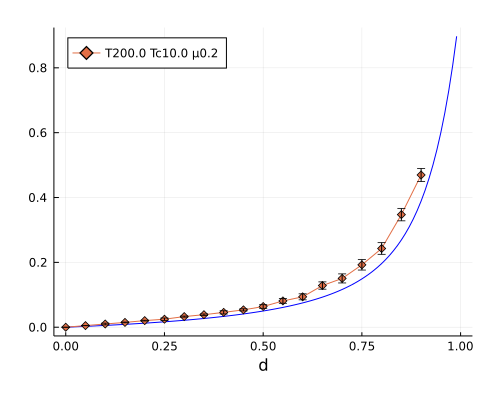

In [48]:
plot(xlabel=:d, size=(500,400), legend=:topleft, margin=5Plots.mm)

ds = 0.:0.01:1.
plot!(ds, [W_orphaned(d / b; N=exp((b-d)*Tcutoff)) for d in ds], lab="", c=:blue )

plot!(drange, t, lab="T$T Tc$Tcutoff μ$μ", marker=:d, xlabel=:d, yerror = sterr)

In [ ]:
data = [
Dict( :T => 80., :Tcutoff => 10., :b => 1.0, :μ => 0.2, :reps => 400,
    :turnover => [0.0, 0.00515, 0.01087, 0.01531, 0.02056, 0.02534, 0.03168, 0.03887, 0.04423, 0.05288, 0.06226, 0.0781, 0.09212, 0.12086, 0.15536, 0.19355, 0.26127, 0.33246, 0.48474],
    :err => [0.0, 0.00044, 0.0007, 0.00111, 0.00186, 0.00133, 0.00292, 0.00426, 0.00427, 0.00555, 0.00488, 0.00784, 0.00741, 0.01107, 0.01385, 0.01697, 0.01791, 0.01876, 0.02026],
    :d => [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9] ),
    
Dict( :T => 200., :Tcutoff => 10., :b => 1.0, :μ => 0.2, :reps => 400,
    :turnover => [0.0, 0.005, 0.0099, 0.01482, 0.02038, 0.02475, 0.03277, 0.03864, 0.04578, 0.05351, 0.06384, 0.0811, 0.09371, 0.12857, 0.1505, 0.1924, 0.24281, 0.34731, 0.46959],
    :err => [0.0, 0.00046, 0.00269, 0.00107, 0.00115, 0.00368, 0.00168, 0.00219, 0.00497, 0.00332, 0.00565, 0.00734, 0.00925, 0.01124, 0.01398, 0.01608, 0.01801, 0.01918, 0.02018],
    :d => [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9] ),

];

In [54]:
data = [
Dict( :N => 10000, :Ncutoff => 200, :b => 1.0, :μ => 0.2, :reps => 500,
    :turnover => [0.0, 0.0061, 0.01363, 0.01803, 0.02513, 0.03178, 0.03715, 0.04302, 0.0511, 0.05614, 0.06818, 0.07241, 0.08424, 0.08917, 0.10072, 0.10802, 0.12237, 0.14937, 0.1757],
    :err => [],
    :d => [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9] ),

Dict( :N => 20000, :Ncutoff => 200, :b => 1.0, :μ => 0.2, :reps => 500,
    :turnover => [0.0, 0.00635, 0.01397, 0.01777, 0.02594, 0.03369, 0.03815, 0.0462, 0.05117, 0.05334, 0.06667, 0.07411, 0.08195, 0.09029, 0.10079, 0.10727, 0.12941, 0.14203, 0.17185],
    :err => [],
    :d => [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9] ),
];

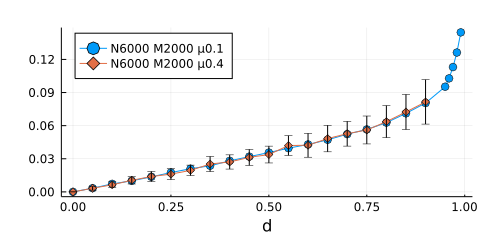

In [11]:
res = sim[4]
plot(res[:d], res[:turnover], lab="N$(res[:N]) M$(res[:Ncutoff]) μ$(res[:μ])", xlabel=:d, size=(500,250), legend=:topleft, margin=5Plots.mm, marker=:o)

plot!(drange, t, lab="N$N M$Ncutoff μ$μ", marker=:d, xlabel=:d, yerror = stdevs)

#### mean of orphan fractions

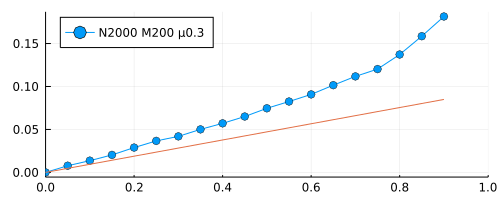

In [52]:
t = [mean( filter!( !isnan, countorph[i,:] ./ countgreens[i,:])) for i=1:length(drange)]

plot(drange, t, lab="N$N M$Ncutoff μ$μ", marker=:o, xlims=(0.,1.), size=(500,200), legend=:topleft)
plot!(drange, turnover.(drange ./ b; N=Ncutoff), lab="", size=(500,200) )

#### mean of accumulated orphan counts

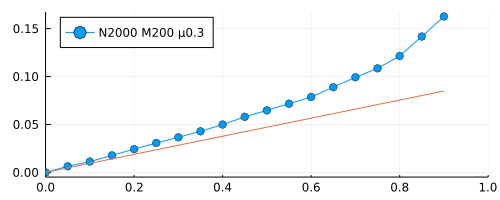

In [51]:
t = [sum(countorph[i,:]) / sum(countgreens[i,:]) for i=1:length(drange)]

plot(drange, t, lab="N$N M$Ncutoff μ$μ", marker=:o, xlims=(0.,1.), size=(500,200), legend=:topleft)
plot!(drange, turnover.(drange ./ b; N=Ncutoff), lab="", size=(500,200) )

#### w/o μ=0. phase

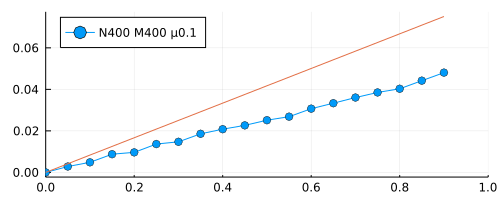

In [39]:
t = [sum(countorph[i,:]) / sum(countgreens[i,:]) for i=1:length(drange)]

plot(drange, t, lab="N$N M$Ncutoff μ$μ", marker=:o, xlims=(0.,1.), size=(500,200), legend=:topleft)
plot!(drange, turnover.(drange ./ b; N=Ncutoff), lab="", size=(500,200) )

### Per **green m-clone**

#### w/ typeones

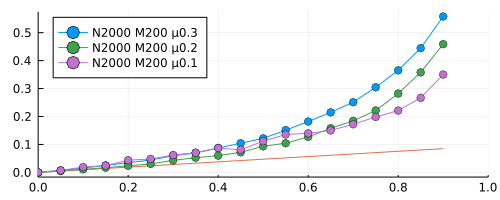

In [128]:
t = [mean( filter!( !isnan, countorph[i,:] ./ countgreens[i,:])) for i=1:length(drange)]

plot!(drange, t, lab="N$N M$Ncutoff μ$μ", marker=:o, xlims=(0.,1.), size=(500,200), legend=:topleft)
# plot!(drange, turnover.(drange ./ b; N=Ncutoff), lab="", size=(500,200) )

#### w/0 typeone

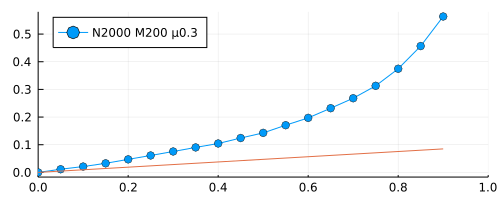

In [54]:
t = [mean( filter!( !isnan, countorph[i,:] ./ countgreens[i,:])) for i=1:length(drange)]

plot(drange, t, lab="N$N M$Ncutoff μ$μ", marker=:o, xlims=(0.,1.), size=(500,200), legend=:topleft)
plot!(drange, turnover.(drange ./ b; N=Ncutoff), lab="", size=(500,200) )

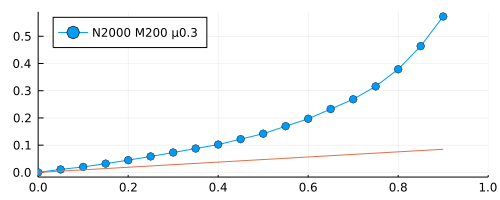

In [55]:
t = [sum(countorph[i,:]) / sum(countgreens[i,:]) for i=1:length(drange)]

plot(drange, t, lab="N$N M$Ncutoff μ$μ", marker=:o, xlims=(0.,1.), size=(500,200), legend=:topleft)
plot!(drange, turnover.(drange ./ b; N=Ncutoff), lab="", size=(500,200) )

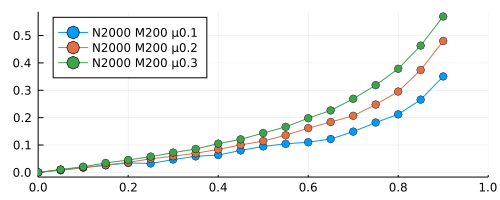

In [67]:
t = [sum(countorph[i,:]) / sum(countgreens[i,:]) for i=1:length(drange)]

plot(xlims=(0.,1.), size=(500,200), legend=:topleft)
plot!(drange, t, marker=:o, lab="N$N M$Ncutoff μ$μ")

### Turnover distribution for given d

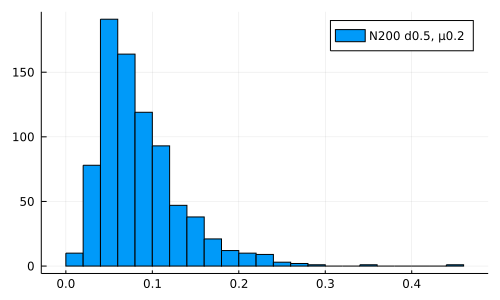

In [20]:
countvec = Float64[]
for _=1:800

    out = neutral_growth(200 ; b = 1.0, d = 0.8, μ = 0.2)
    out = neutral_growth!(out[1], out[2], 2000; Nthresh= 200,  b = b, d = 0.5, μ = 0.2, t=out[4])
    push!(countvec, orphaned(DataFrame(out[1])))
end
histogram(countvec, lab= "N200 d0.5, μ0.2", size=(500,300))

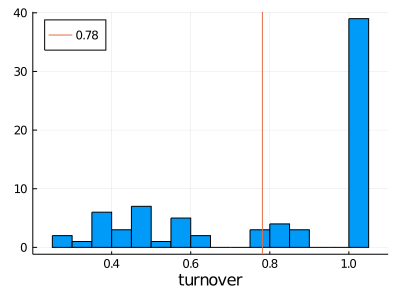

In [85]:
histogram(round.(filter(!ismissing, countorph[1,:]), digits=2), nbins=20, lab="")
vline!([mean(skipmissing(countorph[1,:]))], lab=round(mean(skipmissing(countorph[1,:])), digits=2), legend=:topleft, xlab=:turnover, size=(400,300))

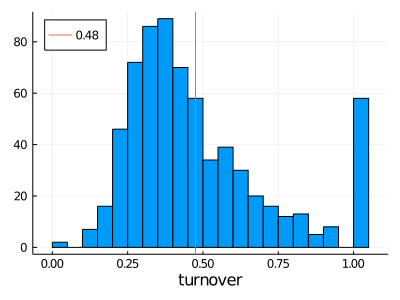

In [98]:
histogram(round.(filter(!ismissing, countorph[1,:]), digits=2), nbins=20, lab="")
vline!([mean(skipmissing(countorph[1,:]))], lab=round(mean(skipmissing(countorph[1,:])), digits=2), legend=:topleft, xlab=:turnover, size=(400,300))

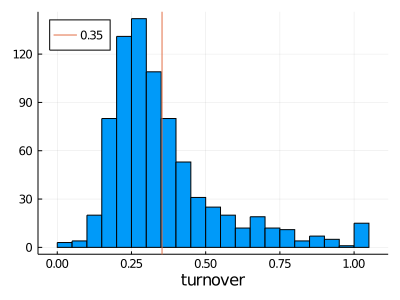

In [94]:
histogram(round.(filter(!ismissing, countorph[1,:]), digits=2), nbins=20, lab="")
vline!([mean(skipmissing(countorph[1,:]))], lab=round(mean(skipmissing(countorph[1,:])), digits=2), legend=:topleft, xlab=:turnover, size=(400,300))

### Clone (orphaned) turnover is invariant wrt. mutation rate
#### Here the tumor gathers mutants up to cutoff size 200 and then grows to its endsize. Turnover curves for different mutation rates μ coincide.

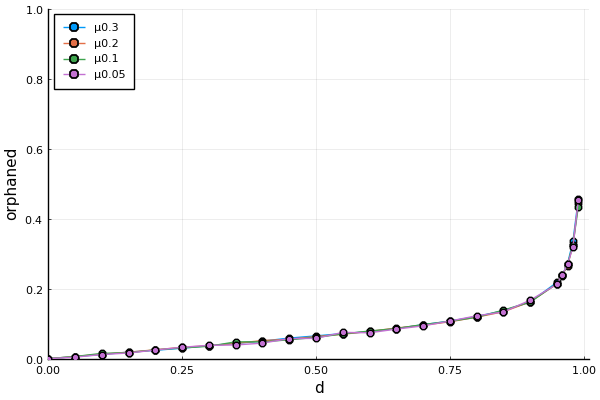

In [186]:
p = plot(size=(600,400), legend=:topleft, xaxis = ("d", (0, 1.01)), yaxis = ("orphaned", (0, 1.)))
for res in sim[1:4]
    b, μ, N = res[:b],res[:μ],res[:Ncutoff]
    ds = res[:d]
    plot!(ds ,res[:turnover], xlab=:d, lab="μ$μ", marker=:o, ms=5.)
end
plot!()

### Orphaned turnover (slightly) depends on cutoff size

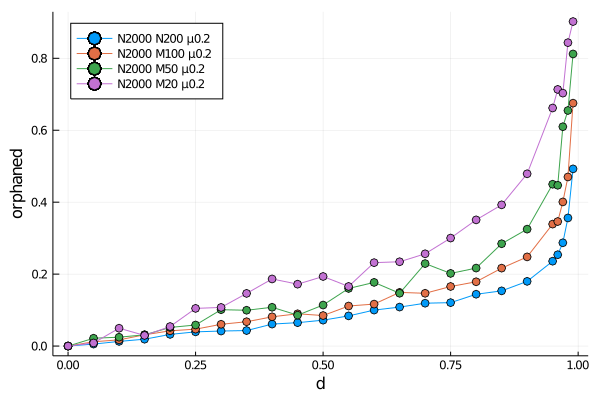

In [40]:
# plot( mat[:,2], mat[:,1], lab="N2000 N200 μ0.2", xlab=:q, ylab=:orphaned, legend=:topleft, marker=:o, size=(600,400))

mcount, Δcount = [mean(skipmissing(countorph[i,:])) for i=1:size(countorph,1)], [std(skipmissing(countorph[i,:])) for i=1:size(countorph,1)]

plot!(drange, mcount, lab="N$N M$Ncutoff μ0.2", marker=:o, legend=:topleft, xlab=:d, ylab=:orphaned)

### Parent (red) clones need time to go extinct
#### Here the tumor gathers mutants up to cutoff size 200 and then grows to its endsize. Cutoffsize needs to be lower than endsize by at least a factor of ~3 for convergence.

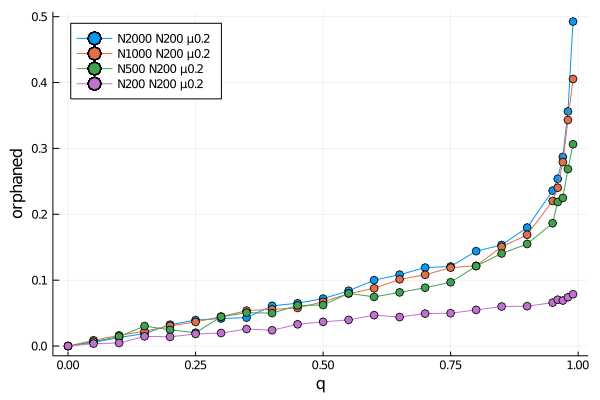

In [23]:
# plot( mat[:,2], mat[:,1], lab="N2000 N200 μ0.2", xlab=:q, ylab=:orphaned, legend=:topleft, marker=:o, size=(600,400))

mcount, Δcount = [mean(skipmissing(countorph[i,:])) for i=1:size(countorph,1)], [std(skipmissing(countorph[i,:])) for i=1:size(countorph,1)]

plot!(drange, mcount, lab="N200 N200 μ0.2", marker=:o)

### frequency cutoff as proxy for size cutoff

In [112]:
N = 2000
Ncutoff = 50

b, μ = 1., 0.2
drange = collect(0.0:0.05:0.90)

reps = 400
countorph = Matrix{Float64}(undef, length(drange), reps)
countgreens = Matrix{Float64}(undef, length(drange), reps)

for (i,dp)=enumerate(drange)
    
    for j in 1:reps
        htumor = neutral_growth(N ; b = b, d = dp, μ = μ)[1] |> DataFrame
        freqs = mfreqs(htumor)
        filter!.(m-> freqs[m] > 1/Ncutoff, htumor.mutations)
        
        res = orphaned_red_treeless(filter(h-> !iszero(h.n), htumor))
#         res = orphaned_red(htumor)
#         filter!(m -> freqs[m.mutation] > 1/Ncutoff, res)
        
        countorph[i,j], countgreens[i,j] = sum(res.isorphaned), sum(res.isgreen)
    end
    
    print("d",dp," ")
    sleep(0.1)
end

d0.0 d0.05 d0.1 d0.15 d0.2 d0.25 d0.3 d0.35 d0.4 d0.45 d0.5 d0.55 d0.6 d0.65 d0.7 d0.75 

Progress: N  1958 	 Time: 0:00:00

d0.8 

Progress: N  1833 	 Time: 0:00:00

d0.85 

Progress: N  1743 	 Time: 0:00:00

d0.9 

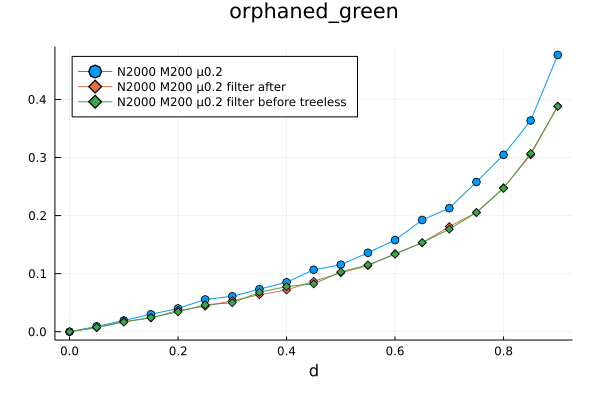

In [111]:
# i = 2
# plot(sim[i][:d], sim[i][:turnover], lab="N2000 M$(sim[i][:Ncutoff]) μ$(sim[i][:μ])", xlabel=:d, size=(600,400), legend=:topleft, margin=5Plots.mm, marker=:o)

t = [sum(countorph[i,:]) / sum(countgreens[i,:]) for i=1:length(drange)]

plot!(drange, t, lab="N$N M$Ncutoff μ$μ filter before treeless", marker=:d)
# plot!(title="orphaned_green")

In [109]:
round.(t, digits=5) |> println

[0.0, 0.00691, 0.01764, 0.02378, 0.03689, 0.04381, 0.05364, 0.0637, 0.07185, 0.08697, 0.1016, 0.11382, 0.13457, 0.15313, 0.1812, 0.20531, 0.24799, 0.30465, 0.38834]


In [ ]:
# N = 2000; f = 1/200; μ = 0.2 # "filter after" or "filter before treeless"
t = [0.0, 0.00691, 0.01764, 0.02378, 0.03689, 0.04381, 0.05364, 0.0637, 0.07185, 0.08697, 0.1016, 0.11382, 0.13457, 0.15313, 0.1812, 0.20531, 0.24799, 0.30465, 0.38834]

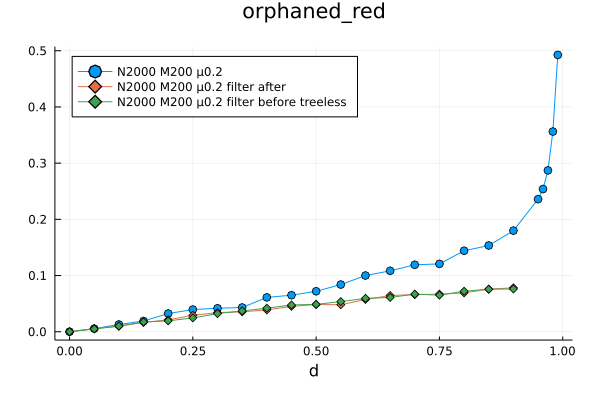

In [16]:
plot(sim[1][:d], sim[1][:turnover], lab="N2000 M$(sim[1][:Ncutoff]) μ$(sim[1][:μ])", xlabel=:d, size=(500,250), legend=:topleft, margin=5Plots.mm, marker=:o)

t = [sum(countorph[i,:]) / sum(countgreens[i,:]) for i=1:length(drange)]

plot!(drange, t, lab="N$N M$Ncutoff μ$μ filter before treeless", marker=:d, size=(600,400))
plot!(title="orphaned_red")

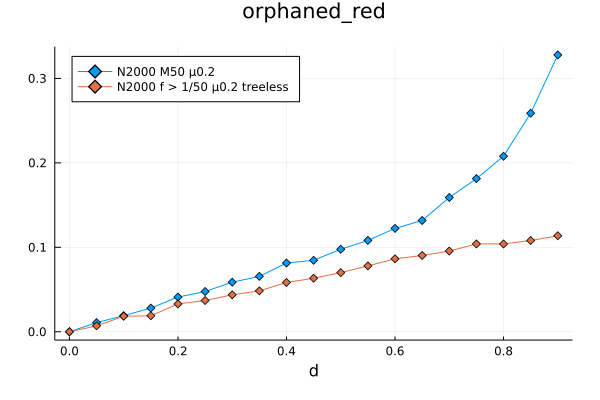

In [120]:
t = [sum(countorph[i,:]) / sum(countgreens[i,:]) for i=1:length(drange)]

plot(xlabel=:d, size=(600,400), legend=:topleft, margin=5Plots.mm)
plot!(drange, t, lab="N$N f > 1/$Ncutoff μ$μ treeless", marker=:d)
plot!(title="orphaned_red")

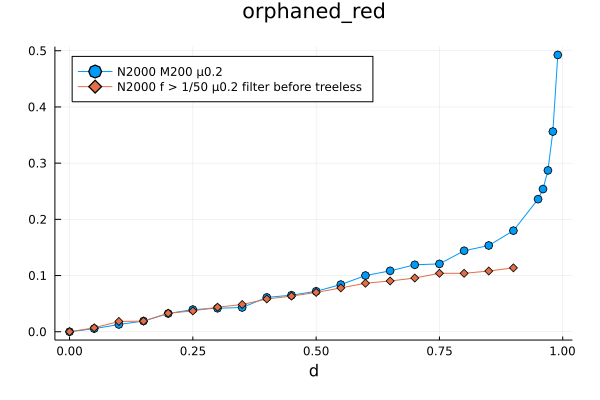

In [115]:
plot(sim[1][:d], sim[1][:turnover], lab="N2000 M$(sim[1][:Ncutoff]) μ$(sim[1][:μ])", xlabel=:d, size=(500,250), legend=:topleft, margin=5Plots.mm, marker=:o)

t = [sum(countorph[i,:]) / sum(countgreens[i,:]) for i=1:length(drange)]

plot!(drange, t, lab="N$N f > 1/$Ncutoff μ$μ filter before treeless", marker=:d, size=(600,400))
plot!(title="orphaned_red")

In [117]:
round.(t, digits=5) |> println

[0.0, 0.00702, 0.01836, 0.01894, 0.03293, 0.03703, 0.04376, 0.04843, 0.05836, 0.06339, 0.06999, 0.07799, 0.08635, 0.09033, 0.09556, 0.10401, 0.10397, 0.10804, 0.11368]


In [121]:
# N = 2000; f = 1/50; μ = 0.2
t = [0.0, 0.00702, 0.01836, 0.01894, 0.03293, 0.03703, 0.04376, 0.04843, 0.05836, 0.06339, 0.06999, 0.07799, 0.08635, 0.09033, 0.09556, 0.10401, 0.10397, 0.10804, 0.11368];

### Average over offspring (green) clones vs parent (red) clones

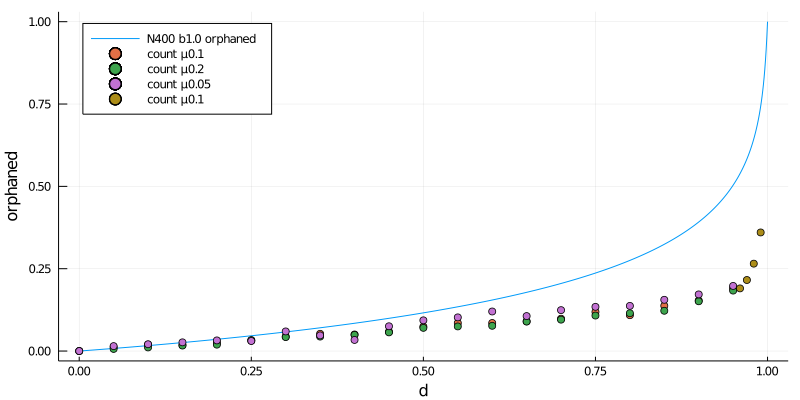

In [246]:
mcount, Δcount = [mean(skipmissing(countorph[i,:])) for i=1:size(countorph,1)], [std(skipmissing(countorph[i,:])) for i=1:size(countorph,1)]

scatter!(p_orph, drange, mcount, lab="count μ$μ", xlab=:d, ylab=:orphaned, legend=:topleft, size=(800, 400))

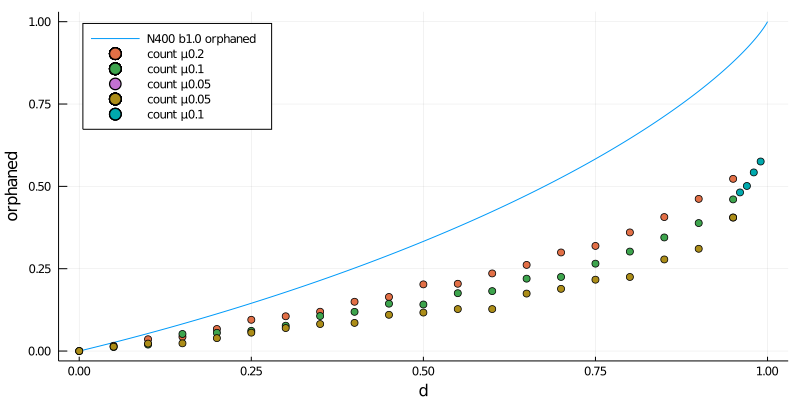

In [237]:
mcount, Δcount = [mean(skipmissing(countorph[i,:])) for i=1:size(countorph,1)], [std(skipmissing(countorph[i,:])) for i=1:size(countorph,1)]

scatter!(p_orph, drange, mcount, lab="count μ$μ", xlab=:d, ylab=:orphaned, legend=:topleft, size=(800, 400))

### Mutations at birth Poisson distributed

In [22]:
using TumorGrowth

In [23]:
# sim = include("orphaned_red_turnover.jl")
sim = include("orphaned_green_turnover.jl")
sim[1]

Dict{Symbol, Any} with 5 entries:
  :b        => 1.0
  :Ncutoff  => 200
  :μ        => 0.3
  :turnover => [0.0, 0.00913, 0.0212, 0.03656, 0.04646, 0.06267, 0.07233, 0.093…
  :d        => [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.5…

In [24]:
function repeat_at_death(N, Ncutoff; b, d, μ)
    try
        out = nonspatial(Ncutoff; b = b, d = d, μ = μ)
        mcutoff = out[:mutation]
        nonspatial!(out[:tumor], N; b = b, d = d, μ = 0, cur_id=out[:index], cur_mutation=out[:mutation], t=out[:time])
        tumor = DataFrame(out[:tumor])
        return mcutoff, tumor
    catch e
        return repeat_at_death(N, Ncutoff; b=b, d=d, μ=μ)
    end
end

repeat_at_death (generic function with 1 method)

In [27]:
N = 2000
Ncutoff = 200

b, μ = 1., 0.2
drange = 0.0:0.05:0.9

reps = 500
countestr = Matrix{Float64}(undef, length(drange), reps)
countgreens = Matrix{Float64}(undef, length(drange), reps)
for (i,dp)=enumerate(drange)
    
    for j=1:reps
        
        mcutoff, tumor = repeat_at_death(N, Ncutoff; b=b, d=dp, μ=μ)
        htumor = DataFrame(mutations = unique(tumor.mutations))
        
        res = orphaned_green_treeless(htumor)

        countestr[i,j], countgreens[i,j] = sum(res.isorphaned), sum(res.isgreen)
    end
    
    print("d",dp," ")
    sleep(0.1)
end

d0.0 d0.05 d0.1 d0.15 d0.2 d0.25 d0.3 d0.35 d0.4 d0.45 d0.5 d0.55 d0.6 d0.65 d0.7 d0.75 d0.8 d0.85 d0.9 

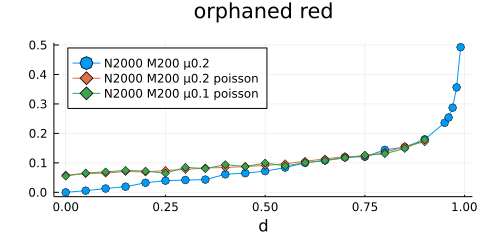

In [24]:
# i = 2
# plot(sim[i][:d], sim[i][:turnover], lab="N2000 M$(sim[i][:Ncutoff]) μ$(sim[i][:μ])", xlabel=:d, size=(500,250), legend=:topleft, margin=5Plots.mm, marker=:o)

t = [sum(countestr[i,:]) / sum(countgreens[i,:]) for i=1:length(drange)]
plot!(drange, t, lab="N$N M$Ncutoff μ$μ poisson", marker=:d, xlabel=:d, title="orphaned red")

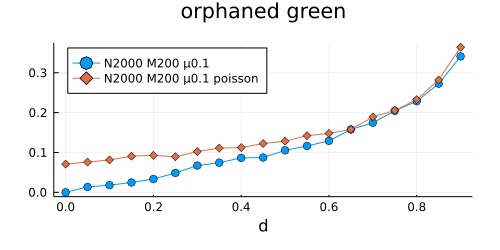

In [26]:
i = 3
plot(sim[i][:d], sim[i][:turnover], lab="N2000 M$(sim[i][:Ncutoff]) μ$(sim[i][:μ])", xlabel=:d, size=(500,250), legend=:topleft, margin=5Plots.mm, marker=:o)

t = [sum(countestr[i,:]) / sum(countgreens[i,:]) for i=1:length(drange)]
plot!(drange, t, lab="N$N M$Ncutoff μ$μ poisson", marker=:d, xlabel=:d, title="orphaned green")

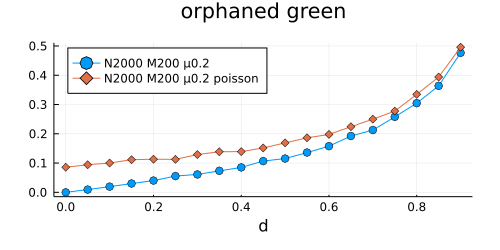

In [29]:
i = 2
plot(sim[i][:d], sim[i][:turnover], lab="N2000 M$(sim[i][:Ncutoff]) μ$(sim[i][:μ])", xlabel=:d, size=(500,250), legend=:topleft, margin=5Plots.mm, marker=:o)

t = [sum(countestr[i,:]) / sum(countgreens[i,:]) for i=1:length(drange)]
plot!(drange, t, lab="N$N M$Ncutoff μ$μ poisson", marker=:d, xlabel=:d, title="orphaned green")